<a href="https://colab.research.google.com/github/thofes/judging_SJ_BA/blob/main/NN_1575_norm_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Connect GDrive
from google.colab import drive
drive.mount('/content.gdrive')

Drive already mounted at /content.gdrive; to attempt to forcibly remount, call drive.mount("/content.gdrive", force_remount=True).


In [4]:
#import json files 1575

import os
import json
import numpy as np
from sklearn.utils import shuffle

PATH = "/content.gdrive/MyDrive/Datasets_1575"
sets = []
try:
    sets = next(os.walk(PATH))[2]
except StopIteration:
    pass

print(sets)
X = np.empty(shape=(0,1575))
y = np.empty(shape=0)



for path in sets:
    path = PATH + '/' + path
    with open(path, "r") as fp:
        data1 = json.load(fp)

    # convert lists to numpy arrays
    X1 = np.array(data1["keypoints"])
    #X = np.array(data["mfcc"])
    y1 = np.array(data1["labels"])

    X = np.concatenate((X,X1), axis=0)
    y = np.concatenate((y,y1), axis=0)
X,y = shuffle(X,y)
with np.printoptions(threshold=np.inf):
    print(y)

print(X.shape)
print(y.shape)
print(y)
print(X)

['data_manually_labeled_original.json', 'data_manually_labled_Telemark_mirror.json', 'data_Manually_Labeled_09042022.json', 'data_Manually_Labeled_mirror_09042022.json', 'data_Manually_Labeled_11042022.json']
[0. 0. 0. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 

In [5]:
#Creating binary classification model 1575
import json
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Activation, Dense, Conv1D, Dropout, MaxPooling1D, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, binary_crossentropy
from sklearn.utils import shuffle


model = Sequential([
    Dense(units=3150, input_shape=(1575,1), activation='relu'), 
    #Dense(units=1575, activation='relu'),                    
    Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.15),
    MaxPooling1D(pool_size=3, strides=3), #max wert der 3 stellen und dann 3 stellen weiter wandern
    Conv1D(filters=64, kernel_size=25, padding='same', activation='relu'),
    Dropout(0.15),
    MaxPooling1D(pool_size=25, strides=25),
    LSTM(21, activation='tanh'),
    Dropout(0.15),
    
    Dense(units=1, activation='sigmoid') #sigmoid
])
"""
model = Sequential([
    Conv1D(filters=32, kernel_size=3, input_shape=(1575,1), padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(), #max wert der 2 stellen und dann 2 stellen weiter wandern (stides = pool Size default)
    Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(),
    Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(),
    Conv1D(filters=256, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(), 
    Conv1D(filters=512, kernel_size=3, padding='same', activation='relu'),
    Dropout(0.4),
    MaxPooling1D(),        
    LSTM(21, activation='tanh'),
    Dropout(0.3),
    Dense(units=1, activation='sigmoid') #sigmoid
])
"""
save_callback = EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=50,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)
def scheduler(epoche, lr):
      if epoche < 2:
          return lr
      else:
          return lr*0.97
lr_scheduler = keras.callbacks.LearningRateScheduler(scheduler, verbose=1)
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])



model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1575, 3150)        6300      
                                                                 
 conv1d_2 (Conv1D)           (None, 1575, 32)          302432    
                                                                 
 dropout_3 (Dropout)         (None, 1575, 32)          0         
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 525, 32)          0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 525, 64)           51264     
                                                                 
 dropout_4 (Dropout)         (None, 525, 64)           0         
                                                      

In [6]:
history = model.fit(x=X, y=y, batch_size=40, validation_split = 0.2, epochs=1000, shuffle=True, verbose = 2, callbacks=[save_callback])

Epoch 1/1000
22/22 - 13s - loss: 0.6930 - accuracy: 0.5237 - val_loss: 0.6958 - val_accuracy: 0.5069 - 13s/epoch - 590ms/step
Epoch 2/1000
22/22 - 6s - loss: 0.6930 - accuracy: 0.5306 - val_loss: 0.6931 - val_accuracy: 0.5069 - 6s/epoch - 283ms/step
Epoch 3/1000
22/22 - 6s - loss: 0.6912 - accuracy: 0.5306 - val_loss: 0.6937 - val_accuracy: 0.5069 - 6s/epoch - 283ms/step
Epoch 4/1000
22/22 - 6s - loss: 0.6904 - accuracy: 0.5306 - val_loss: 0.6914 - val_accuracy: 0.5069 - 6s/epoch - 283ms/step
Epoch 5/1000
22/22 - 6s - loss: 0.6895 - accuracy: 0.5306 - val_loss: 0.6859 - val_accuracy: 0.5069 - 6s/epoch - 283ms/step
Epoch 6/1000
22/22 - 6s - loss: 0.6882 - accuracy: 0.5607 - val_loss: 0.6853 - val_accuracy: 0.6037 - 6s/epoch - 285ms/step
Epoch 7/1000
22/22 - 6s - loss: 0.6820 - accuracy: 0.5341 - val_loss: 0.6629 - val_accuracy: 0.6544 - 6s/epoch - 285ms/step
Epoch 8/1000
22/22 - 6s - loss: 0.6748 - accuracy: 0.5827 - val_loss: 0.6478 - val_accuracy: 0.6313 - 6s/epoch - 285ms/step
Epoch 

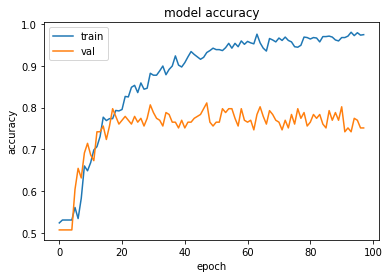

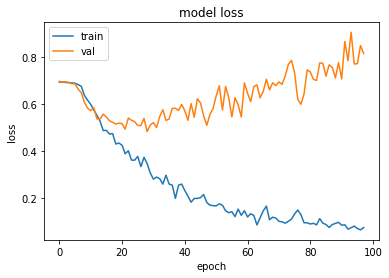

In [7]:
import keras
from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [8]:
with open('/content.gdrive/MyDrive/Datasets_1575/data_Manually_Labeled_09042022.json', "r") as fp:
    data2 = json.load(fp)
# convert lists to numpy arrays
X2 = np.array(data2["keypoints"])
y2 = np.array(data2["labels"])

predictions = model.predict(X2, batch_size = 10, verbose =0)

print(predictions, y2)
counter =0
for i, x in enumerate(predictions):
    if np.around(x) != y2[i]:
        counter+=1
print(y2.shape)
print(counter)

[[0.865722  ]
 [0.93222284]
 [0.88553035]
 [0.40880123]
 [0.9822093 ]
 [0.89494944]
 [0.9422055 ]
 [0.9168188 ]
 [0.98532075]
 [0.8593938 ]
 [0.9916882 ]
 [0.9753244 ]
 [0.7272215 ]
 [0.905553  ]
 [0.953312  ]
 [0.93396765]
 [0.98963344]
 [0.9216202 ]
 [0.97856474]
 [0.73427737]
 [0.8151293 ]
 [0.85292363]
 [0.9836818 ]
 [0.9706477 ]
 [0.95658255]
 [0.95083266]
 [0.80464613]
 [0.02396046]
 [0.95094866]
 [0.6155536 ]
 [0.962022  ]
 [0.958884  ]
 [0.9649267 ]
 [0.98284435]
 [0.9679781 ]
 [0.9838488 ]
 [0.95704746]
 [0.9738444 ]
 [0.979742  ]
 [0.23249316]
 [0.9414116 ]
 [0.9760888 ]
 [0.962248  ]
 [0.95403063]
 [0.87075144]
 [0.8039659 ]
 [0.92105836]
 [0.94822896]
 [0.85755706]
 [0.90041554]
 [0.08972673]
 [0.8711704 ]
 [0.97928774]
 [0.9648343 ]
 [0.8794633 ]
 [0.6127362 ]
 [0.9363748 ]
 [0.9713236 ]
 [0.80962837]
 [0.8947233 ]
 [0.00930111]
 [0.95839244]
 [0.75440973]
 [0.97132957]
 [0.930731  ]
 [0.80840755]
 [0.9584617 ]
 [0.96066934]
 [0.5511772 ]
 [0.27902666]
 [0.91943   ]
 [0.78